# The Hindmarsh-Rose Model

The Hindmarsh-Rose model is a phenomenological neuronal model capable of exhibiting a wide range of neural dynamics, including quiescence, tonic spiking, and different bursting patterns. Introduced in 1984 by J.L. Hindmarsh and R.M. Rose, this three-dimensional system of ordinary differential equations captures the essential dynamics of neuronal behavior while being computationally simpler than detailed biophysical models. The key feature is the separation of timescales between fast spiking dynamics and slow modulation that enables bursting.

## Key Properties

1. **Multiple Firing Patterns**: Can generate single spikes, regular bursting, chaotic bursting, and quiescence
2. **Spike Adaptation**: Demonstrates spike frequency adaptation within bursts
3. **Bifurcation Structure**: Rich dynamics arising from multiple bifurcations
4. **Chaos**: Can exhibit deterministic chaos in certain parameter regimes
5. **Low Dimensionality**: Three-dimensional system that captures complex dynamics efficiently

## Mathematical Description

The model is described by three coupled differential equations:

dx/dt = y - ax³ + bx² - z + I

dy/dt = c - dx² - y

dz/dt = r[s(x - x₀) - z]

When a spike occurs (typically when x crosses a threshold from below):
  • No explicit reset is needed (the dynamics provide the reset)

Parameters:
- x: Membrane potential-like variable
- y: Recovery variable (similar to K+ dynamics)
- z: Slow adaptation current
- a: Controls the fast subsystem nullcline shape (typically 1.0)
- b: Controls the fast subsystem nullcline shape (typically 3.0)
- c: Determines the y-nullcline position (typically 1.0)
- d: Controls the y-nullcline shape (typically 5.0)
- r: Time scale separation parameter (typically 0.001-0.01)
- s: Coupling strength between x and z (typically 4.0)
- x₀: Threshold for slow current activation (typically -1.6)
- I: External current input

State Variables:
- x: Fast variable representing membrane potential (initialize around -1.5)
- y: Fast recovery variable (initialize around -10.0)
- z: Slow adaptation variable (initialize around 0.0)

Time-related variables:
- dt: Time step for numerical integration
- t: Current simulation time
- tmax: Maximum simulation time

## Algorithm

1. Initialize state variables
   - x = -1.5 (typical initial value)
   - y = -10.0 (typical initial value)
   - z = 0.0 (typical initial value)
   - Create empty list for spike times

2. For each time step from t=0 to t=tmax:
   
   a. Check if spike occurs (optional for analysis)
      - If x crosses a threshold (e.g., x > 0) from below:
        • Record spike time
   
   b. Compute derivative terms
      - dx/dt = y - ax³ + bx² - z + I
      - dy/dt = c - dx² - y
      - dz/dt = r[s(x - x₀) - z]
   
   c. Update state variables using numerical method (Euler, Runge-Kutta, etc.)
      - x = x + dx/dt * dt
      - y = y + dy/dt * dt
      - z = z + dz/dt * dt
   
   d. Store variables for plotting
      - Record x, y, z at current time step
   
   e. Increment time: t = t + dt

3. Analyze and visualize results
   - Plot membrane potential-like variable (x) vs time
   - Plot phase space projections (x-y, x-z, y-z)
   - Calculate burst statistics (burst duration, interburst interval)
   - Analyze within-burst firing rate vs. between-burst intervals
   - Compute Lyapunov exponents for chaos characterization (optional)

## Characteristic Behaviors

1. **Regular Spiking**: With low I and appropriate parameters, produces regular single spikes
2. **Square-Wave Bursting**: Produces bursts with relatively constant amplitude spikes
3. **Parabolic Bursting**: Spike frequency increases then decreases within a burst
4. **Mixed-Mode Oscillations**: Alternating patterns of spikes and bursts
5. **Chaotic Dynamics**: Irregular bursting patterns that are deterministically chaotic
6. **Bistability**: Can exhibit two stable solutions for the same parameter values
7. **Transition to Chaos**: Displays period-doubling route to chaos with parameter variation

## Biological Mechanisms Represented

The three variables represent:
- x: Fast membrane potential dynamics (Na+ and K+ currents)
- y: Fast recovery variable (K+ channel activation)
- z: Slow adaptation current (Ca²+-activated K+ channels or slow inactivation)

While phenomenological, these variables capture:
- Fast spike-generating mechanism (x-y subsystem)
- Slow modulation of excitability (z variable)
- Multiple timescales present in real neurons
- Interaction between fast spikes and slow currents

## Applications

The Hindmarsh-Rose model is particularly useful for modeling:
- Bursting neurons in various brain regions (thalamus, hippocampus)
- Central pattern generators
- Transitions between different firing patterns
- Studies of neuronal synchronization and network dynamics
- Investigation of chaotic dynamics in neural systems
- Teaching neuronal dynamics principles
- Computational efficiency in large-scale network models
- Understanding how parameter changes affect firing patterns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

class HindmarshRose:
    def __init__(self, a=1.0, b=3.0, c=1.0, d=5.0, r=0.006, s=4.0, x_rest=-1.6, I=3.0, time_steps=None):
        """
        Initialize the Hindmarsh-Rose neuron model.
        
        Parameters:
        -----------
        a, b, c, d, r, s: Model parameters
        x_rest: Resting potential for the slow adaptation equation
        I: External current input
        time_steps: Array of time points for simulation
        """
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.r = r
        self.s = s
        self.x_rest = x_rest
        self.I = I
        self.time_steps = time_steps
        
    def simulate(self, x0=-1.5, y0=-10.0, z0=0.0):
        """
        Simulate the Hindmarsh-Rose model using Euler's method.
        
        Parameters:
        -----------
        x0, y0, z0: Initial conditions for membrane potential, recovery variable,
                    and slow adaptation current
        
        Returns:
        --------
        x_values, y_values, z_values: Arrays of simulation results
        spikes: List of spike times
        """
        # Initialize arrays to store results
        n_steps = len(self.time_steps)
        x_values = np.zeros(n_steps)
        y_values = np.zeros(n_steps)
        z_values = np.zeros(n_steps)
        
        # Set initial conditions
        x_values[0] = x0
        y_values[0] = y0
        z_values[0] = z0
        
        # Calculate time step
        dt = self.time_steps[1] - self.time_steps[0]
        
        # Track spikes (when membrane potential crosses 0 from below)
        spikes = []
        
        # Numerical integration using Euler's method
        for i in range(1, n_steps):
            # Calculate derivatives
            dx = y_values[i-1] - self.a * x_values[i-1]**3 + self.b * x_values[i-1]**2 - z_values[i-1] + self.I
            dy = self.c - self.d * x_values[i-1]**2 - y_values[i-1]
            dz = self.r * (self.s * (x_values[i-1] - self.x_rest) - z_values[i-1])
            
            # Update values using Euler's method
            x_values[i] = x_values[i-1] + dx * dt
            y_values[i] = y_values[i-1] + dy * dt
            z_values[i] = z_values[i-1] + dz * dt
            
            # Detect spikes (when membrane potential crosses a threshold from below)
            if x_values[i-1] < 0 and x_values[i] >= 0:
                # Interpolate to get more accurate spike time
                t_spike = self.time_steps[i-1] + dt * (0 - x_values[i-1]) / (x_values[i] - x_values[i-1])
                spikes.append(t_spike)
        
        return x_values, y_values, z_values, spikes
    
    def plot_results(self, x_values, y_values, z_values, spikes):
        """
        Plot the simulation results.
        
        Parameters:
        -----------
        x_values, y_values, z_values: Arrays of simulation results
        spikes: List of spike times
        """
        fig = plt.figure(figsize=(12, 10))
        gs = GridSpec(4, 1, height_ratios=[3, 1, 1, 1])
        
        # Plot membrane potential (x)
        ax1 = plt.subplot(gs[0])
        ax1.plot(self.time_steps, x_values, 'b-', label='Membrane Potential (X)')
        
        # Plot spikes as vertical lines
        for spike in spikes:
            ax1.axvline(x=spike, color='r', linestyle='-', alpha=0.5)
        
        ax1.set_ylabel('Membrane Potential')
        ax1.set_title('Hindmarsh-Rose Neuron Model')
        ax1.grid(True)
        ax1.legend()
        
        # Plot recovery variable (y)
        ax2 = plt.subplot(gs[1], sharex=ax1)
        ax2.plot(self.time_steps, y_values, 'g-', label='Recovery Variable (Y)')
        ax2.set_ylabel('Y')
        ax2.grid(True)
        ax2.legend()
        
        # Plot slow adaptation current (z)
        ax3 = plt.subplot(gs[2], sharex=ax1)
        ax3.plot(self.time_steps, z_values, 'r-', label='Adaptation Current (Z)')
        ax3.set_ylabel('Z')
        ax3.grid(True)
        ax3.legend()
        
        # Plot phase space (X vs Y)
        ax4 = plt.subplot(gs[3])
        ax4.plot(x_values, y_values, 'k-', alpha=0.7)
        ax4.set_xlabel('Membrane Potential (X)')
        ax4.set_ylabel('Recovery Variable (Y)')
        ax4.set_title('Phase Space')
        ax4.grid(True)
        
        plt.tight_layout()
        plt.show()
        
    def plot_3d_phase_space(self, x_values, y_values, z_values):
        """
        Plot the 3D phase space trajectory.
        
        Parameters:
        -----------
        x_values, y_values, z_values: Arrays of simulation results
        """
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        ax.plot(x_values, y_values, z_values, 'b-', alpha=0.7)
        
        ax.set_xlabel('Membrane Potential (X)')
        ax.set_ylabel('Recovery Variable (Y)')
        ax.set_zlabel('Adaptation Current (Z)')
        ax.set_title('3D Phase Space - Hindmarsh-Rose Model')
        
        plt.tight_layout()
        plt.show()

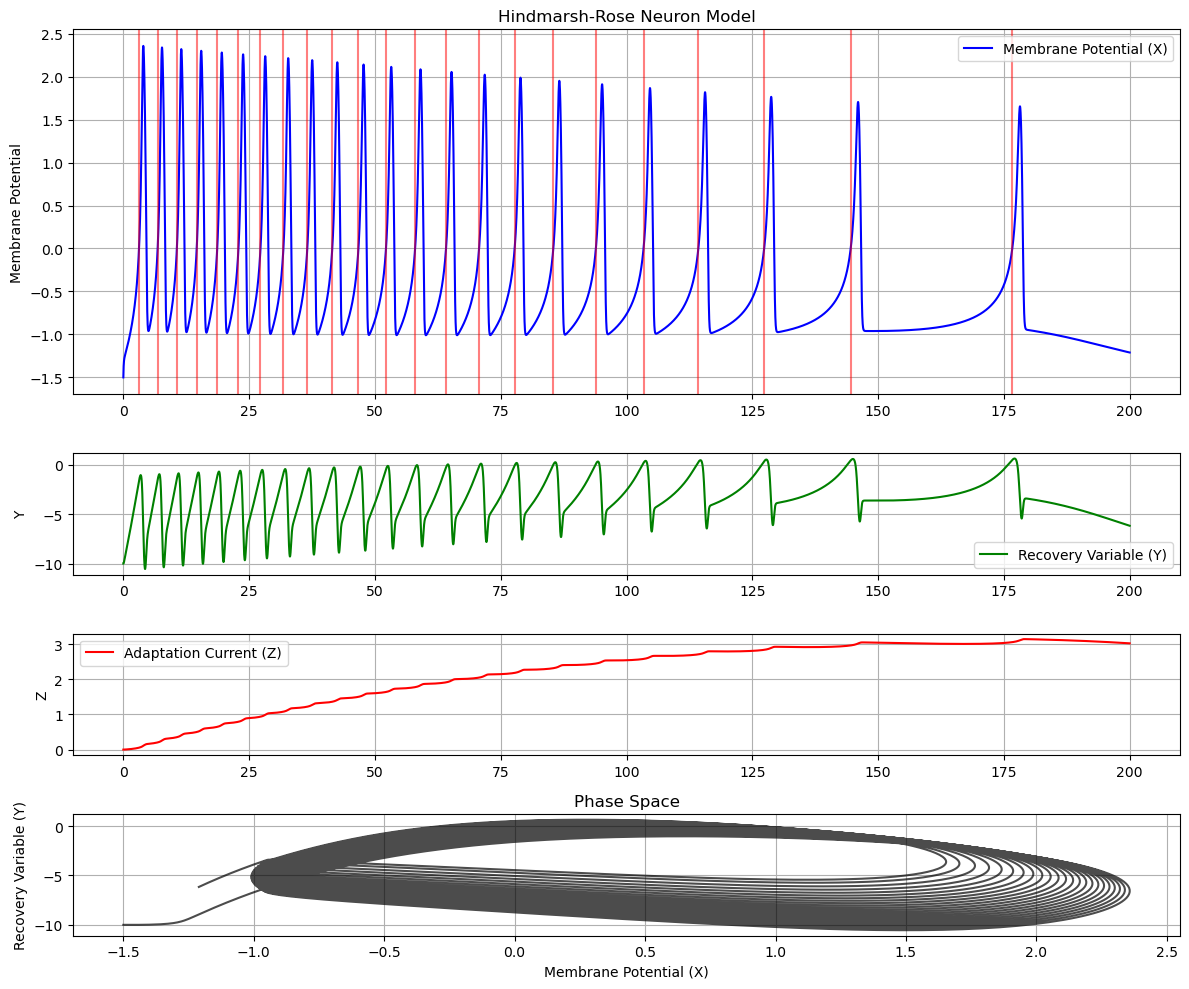

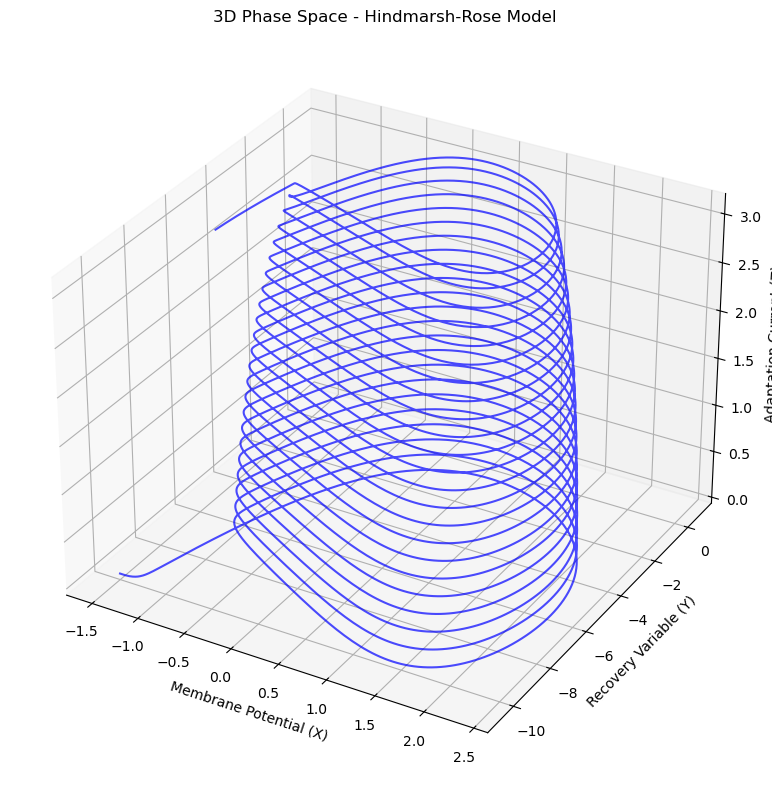

In [2]:
# Example usage of the Hindmarsh-Rose model
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Set up time steps
t_max = 200  # ms
dt = 0.01  # ms
time_steps = np.arange(0, t_max, dt)

# Create neuron with default parameters
neuron = HindmarshRose(
    a=1.0,
    b=3.0, 
    c=1.0, 
    d=5.0, 
    r=0.006, 
    s=4.0, 
    x_rest=-1.6,
    I=3.0,  # Input current (controls bursting behavior)
    time_steps=time_steps
)

# Run simulation
x_values, y_values, z_values, spikes = neuron.simulate()

# Plot results
neuron.plot_results(x_values, y_values, z_values, spikes)

# Plot 3D phase space
neuron.plot_3d_phase_space(x_values, y_values, z_values)